In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("mobile_prices_2023.csv")

In [3]:
data.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [7]:
## Changing all the columns one by one to int or float

In [6]:
data.shape

(1836, 11)

In [19]:
data.isnull().sum()

Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
dtype: int64

In [20]:
data=data.dropna()

In [21]:
data.shape

(1291, 9)

In [8]:
data.columns

Index(['Phone Name', 'Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage',
       'Back/Rare Camera', 'Front Camera', 'Battery', 'Processor',
       'Price in INR', 'Date of Scraping'],
      dtype='object')

In [9]:
## Since phone name and date of scraping does not have any effect on price. Dropping them

In [10]:
drop_column = ["Phone Name",'Date of Scraping']
data.drop(drop_column, axis = 1, inplace = True)

In [11]:
data.columns

Index(['Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage',
       'Back/Rare Camera', 'Front Camera', 'Battery', 'Processor',
       'Price in INR'],
      dtype='object')

In [12]:
data['Price in INR'] = data['Price in INR'].str.replace("₹","")

In [13]:
data['Price in INR']

0        5,649
1       11,999
2        6,999
3        7,749
4        6,999
         ...  
1831    14,999
1832    14,999
1833    14,999
1834    18,999
1835    10,999
Name: Price in INR, Length: 1836, dtype: object

In [14]:
data['Price in INR'] = data['Price in INR'].str.replace(",","")

In [15]:
data['Price in INR']

0        5649
1       11999
2        6999
3        7749
4        6999
        ...  
1831    14999
1832    14999
1833    14999
1834    18999
1835    10999
Name: Price in INR, Length: 1836, dtype: object

In [16]:
data['Price in INR'] = data['Price in INR'].astype('float')

In [17]:
data['Price in INR']

0        5649.0
1       11999.0
2        6999.0
3        7749.0
4        6999.0
         ...   
1831    14999.0
1832    14999.0
1833    14999.0
1834    18999.0
1835    10999.0
Name: Price in INR, Length: 1836, dtype: float64

In [18]:
set(data['Processor'])

{'0 0 0 0 Processor Processor',
 '0 0 0 208MHz Processor',
 '0 0 Quad Core 1.3GHz Processor',
 '1 YEAR',
 '1 YEAR Brand warranty on phone, 6 months on accessories',
 '1 YEAR FOR DEVICE & SIX MONTH FOR INBOX ACCESSORIES',
 '1 YEAR ON MOBILE AND 6 MONTHS FOR ACCESORIES',
 '1 Year',
 '1 Year  Manufacturer Warranty',
 '1 Year Domestic Warranty for Phone and 6 Months Warranty for In-Box Accessories',
 '1 Year Manufacturer  Warranty',
 '1 Year Manufacturer Replacement Warranty',
 '1 Year Manufacturer Replacement warranty',
 '1 Year Manufacturer Warranty',
 '1 Year Manufacturer Warranty For Device and Battery and 6 Months Manufacturer Warranty for In-box Accessories From the Date of Purchase',
 '1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for In-Box',
 '1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for In-Box Accessories',
 '1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for In-box Accessories Including Ba

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
data['Processor'] = le.fit_transform(data['Processor'])

In [25]:
data

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
0,4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,116,5649.0
1,4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,102,11999.0
2,4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,40,6999.0
3,4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,122,7749.0
4,4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,40,6999.0
...,...,...,...,...,...,...,...,...,...
1831,4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,75,14999.0
1832,4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,75,14999.0
1833,4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,75,14999.0
1834,4.2,"7,117",8 GB RAM,128 GB ROM,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,80,18999.0


In [28]:
data['Battery'] = data['Battery'].str.replace("mAh","")

In [29]:
data['Battery'] = data['Battery'].astype("int")

In [30]:
data

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
0,4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000,116,5649.0
1,4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000,102,11999.0
2,4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000,40,6999.0
3,4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000,122,7749.0
4,4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000,40,6999.0
...,...,...,...,...,...,...,...,...,...
1831,4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000,75,14999.0
1832,4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000,75,14999.0
1833,4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000,75,14999.0
1834,4.2,"7,117",8 GB RAM,128 GB ROM,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500,80,18999.0


In [32]:
data['Front Camera'] = le.fit_transform(data['Front Camera'])

In [34]:
data['Back/Rare Camera'] = le.fit_transform(data['Back/Rare Camera'])

In [35]:
data

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
0,4.2,"33,561",2 GB RAM,32 GB ROM,144,26,5000,116,5649.0
1,4.2,"77,128",4 GB RAM,64 GB ROM,99,31,5000,102,11999.0
2,4.3,"15,175",4 GB RAM,64 GB ROM,145,26,5000,40,6999.0
3,4.2,"22,621",4 GB RAM,64 GB ROM,118,26,5000,122,7749.0
4,4.3,"15,175",4 GB RAM,64 GB ROM,145,26,5000,40,6999.0
...,...,...,...,...,...,...,...,...,...
1831,4.3,"25,582",4 GB RAM,64 GB ROM,69,12,5000,75,14999.0
1832,4.3,"25,582",4 GB RAM,64 GB ROM,69,12,5000,75,14999.0
1833,4.3,"25,582",4 GB RAM,64 GB ROM,69,12,5000,75,14999.0
1834,4.2,"7,117",8 GB RAM,128 GB ROM,77,10,4500,80,18999.0


In [36]:
set(data["ROM/Storage"])

{'0 GB ROM',
 '128 GB ROM',
 '16 GB ROM',
 '256 GB ROM',
 '32 GB ROM',
 '4 GB ROM',
 '512 GB ROM',
 '64 GB ROM',
 '8 GB ROM',
 'NA ROM'}

In [38]:
data["ROM/Storage"]= data['ROM/Storage'].str.replace("NA ROM", "0 GB ROM")

In [39]:
set(data["ROM/Storage"])

{'0 GB ROM',
 '128 GB ROM',
 '16 GB ROM',
 '256 GB ROM',
 '32 GB ROM',
 '4 GB ROM',
 '512 GB ROM',
 '64 GB ROM',
 '8 GB ROM'}

In [40]:
data["ROM/Storage"]= data['ROM/Storage'].str.replace(" GB ROM",'')

In [42]:
data["ROM/Storage"] = data["ROM/Storage"].astype('int')

In [43]:
data

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
0,4.2,"33,561",2 GB RAM,32,144,26,5000,116,5649.0
1,4.2,"77,128",4 GB RAM,64,99,31,5000,102,11999.0
2,4.3,"15,175",4 GB RAM,64,145,26,5000,40,6999.0
3,4.2,"22,621",4 GB RAM,64,118,26,5000,122,7749.0
4,4.3,"15,175",4 GB RAM,64,145,26,5000,40,6999.0
...,...,...,...,...,...,...,...,...,...
1831,4.3,"25,582",4 GB RAM,64,69,12,5000,75,14999.0
1832,4.3,"25,582",4 GB RAM,64,69,12,5000,75,14999.0
1833,4.3,"25,582",4 GB RAM,64,69,12,5000,75,14999.0
1834,4.2,"7,117",8 GB RAM,128,77,10,4500,80,18999.0


In [44]:
set(data["RAM"])

{'1 GB RAM',
 '1.5 GB RAM',
 '12 GB RAM',
 '16 MB RAM',
 '2 GB RAM',
 '3 GB RAM',
 '4 GB RAM',
 '512 MB RAM',
 '6 GB RAM',
 '8 GB RAM',
 '8 MB RAM'}

In [45]:
data["RAM"]= data['RAM'].str.replace("512 MB RAM",'0.5 GB RAM')

In [46]:
data["RAM"]= data['RAM'].str.replace("8 MB RAM",'8 GB RAM')

In [47]:
data["RAM"]= data['RAM'].str.replace("16 MB RAM",'16 GB RAM')

In [48]:
set(data["RAM"])

{'0.5 GB RAM',
 '1 GB RAM',
 '1.5 GB RAM',
 '12 GB RAM',
 '16 GB RAM',
 '2 GB RAM',
 '3 GB RAM',
 '4 GB RAM',
 '6 GB RAM',
 '8 GB RAM'}

In [50]:
data["RAM"]= data['RAM'].str.replace(' GB RAM','')

In [51]:
data["RAM"] = data["RAM"].astype('float')

In [52]:
data

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
0,4.2,"33,561",2.0,32,144,26,5000,116,5649.0
1,4.2,"77,128",4.0,64,99,31,5000,102,11999.0
2,4.3,"15,175",4.0,64,145,26,5000,40,6999.0
3,4.2,"22,621",4.0,64,118,26,5000,122,7749.0
4,4.3,"15,175",4.0,64,145,26,5000,40,6999.0
...,...,...,...,...,...,...,...,...,...
1831,4.3,"25,582",4.0,64,69,12,5000,75,14999.0
1832,4.3,"25,582",4.0,64,69,12,5000,75,14999.0
1833,4.3,"25,582",4.0,64,69,12,5000,75,14999.0
1834,4.2,"7,117",8.0,128,77,10,4500,80,18999.0


In [53]:
data["Number of Ratings"]= data['Number of Ratings'].str.replace(',','')

In [55]:
data["Number of Ratings"]= data['Number of Ratings'].astype('int')
data

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
0,4.2,33561,2.0,32,144,26,5000,116,5649.0
1,4.2,77128,4.0,64,99,31,5000,102,11999.0
2,4.3,15175,4.0,64,145,26,5000,40,6999.0
3,4.2,22621,4.0,64,118,26,5000,122,7749.0
4,4.3,15175,4.0,64,145,26,5000,40,6999.0
...,...,...,...,...,...,...,...,...,...
1831,4.3,25582,4.0,64,69,12,5000,75,14999.0
1832,4.3,25582,4.0,64,69,12,5000,75,14999.0
1833,4.3,25582,4.0,64,69,12,5000,75,14999.0
1834,4.2,7117,8.0,128,77,10,4500,80,18999.0


In [56]:
data["Rating ?/5"]= data['Rating ?/5'].astype('float')
data

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
0,4.2,33561,2.0,32,144,26,5000,116,5649.0
1,4.2,77128,4.0,64,99,31,5000,102,11999.0
2,4.3,15175,4.0,64,145,26,5000,40,6999.0
3,4.2,22621,4.0,64,118,26,5000,122,7749.0
4,4.3,15175,4.0,64,145,26,5000,40,6999.0
...,...,...,...,...,...,...,...,...,...
1831,4.3,25582,4.0,64,69,12,5000,75,14999.0
1832,4.3,25582,4.0,64,69,12,5000,75,14999.0
1833,4.3,25582,4.0,64,69,12,5000,75,14999.0
1834,4.2,7117,8.0,128,77,10,4500,80,18999.0


In [59]:
data.columns

Index(['Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage',
       'Back/Rare Camera', 'Front Camera', 'Battery', 'Processor',
       'Price in INR'],
      dtype='object')

In [60]:
X = data[['Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage',
       'Back/Rare Camera', 'Front Camera', 'Battery', 'Processor']]

In [61]:
y = data['Price in INR']

In [57]:
from sklearn.feature_selection import mutual_info_regression

In [62]:
mir = mutual_info_regression(X,y)

In [63]:
mir

array([0.31698594, 0.98350538, 0.71110702, 0.56783384, 1.07192927,
       0.72381643, 0.56636501, 1.11162532])

In [64]:
mir_series = pd.Series(mir)

In [65]:
mir_series

0    0.316986
1    0.983505
2    0.711107
3    0.567834
4    1.071929
5    0.723816
6    0.566365
7    1.111625
dtype: float64

In [66]:
mir_series.index=X.columns

In [67]:
mir_series

Rating ?/5           0.316986
Number of Ratings    0.983505
RAM                  0.711107
ROM/Storage          0.567834
Back/Rare Camera     1.071929
Front Camera         0.723816
Battery              0.566365
Processor            1.111625
dtype: float64

In [76]:
mir_series=mir_series.sort_values(ascending = False)
mir_series

Processor            1.111625
Back/Rare Camera     1.071929
Number of Ratings    0.983505
Front Camera         0.723816
RAM                  0.711107
ROM/Storage          0.567834
Battery              0.566365
Rating ?/5           0.316986
dtype: float64

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Mutual Information Regression')

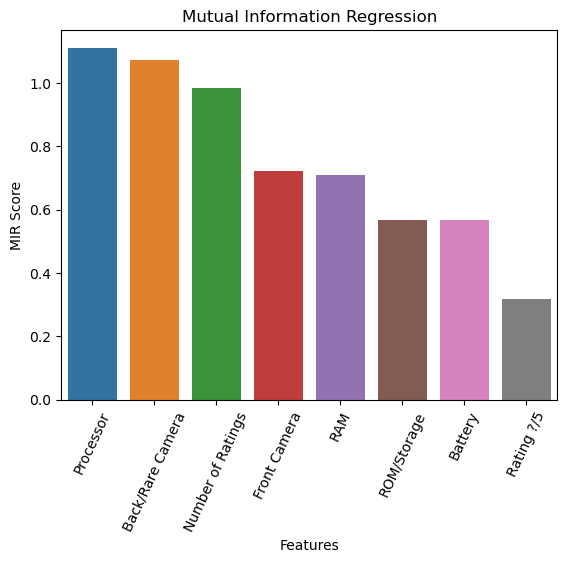

In [75]:
sns.barplot(x=mir_series.index,y=mir_series.values)
plt.xticks(rotation = 65)
plt.xlabel("Features")
plt.ylabel("MIR Score")
plt.title("Mutual Information Regression")